# Exploratory Data Analysis

In [1]:
# importing libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing
warnings.filterwarnings("ignore")

# adding scripts to path
sys.path.append(os.path.abspath("../scripts/python"))

In [2]:
# loading scripts
from manager import Manager
from processing import Processing
man = Manager()
pro = Processing()

In [3]:
# establishing connection

connection, cursor = man.connect_to_server(host="localhost", port=5432, user="warehouse", password="warehouse", dbName="warehouse")

successfully connected; cursor: <cursor object at 0x7f3efe564310; closed: 0>


In [4]:
# fetching data
data = man.fetch_data(conn=connection, limit=1000000)
data.head(5)

,campaign_id,types,width,height,creative_id,auction_id,browser_ts,game_key,geo_country,site_name,...,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost,design_feature,feature_type,feature_variety,sub_feature,feature_value
0,wgh1kec,impression,250,250,5eoryjux,cd269149841b4b18b6a959011da6a134,2021-04-28 22:58:14,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,oldhousesunder50k.com,...,151515.15,50000.0,Percentage,0.0,50000,None,None,None,None,None
1,wgh1kec,impression,250,250,5eoryjux,a7a2548cc316412e91617180c2e56f3c,2021-04-28 22:58:16,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,www.thefrugalgirl.com,...,151515.15,50000.0,Percentage,0.0,50000,None,None,None,None,None
2,wgh1kec,impression,250,250,5eoryjux,075f910ccb8e494a87184bd69bb6ed01,2021-04-28 22:58:20,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,detoxinista.com,...,151515.15,50000.0,Percentage,0.0,50000,None,None,None,None,None
3,wgh1kec,impression,250,250,5eoryjux,bb1320326fab4a71bdcbf23c78908241,2021-04-28 22:58:26,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,www.jocooks.com,...,151515.15,50000.0,Percentage,0.0,50000,None,None,None,None,None
4,wgh1kec,impression,250,250,5eoryjux,78e6ec13c97c4390afc9aa11095801f9,2021-04-28 22:58:28,adunit-lionsgate-spiral-puzzle-mpu/08600918347...,United States,www.simplywhisked.com,...,151515.15,50000.0,Percentage,0.0,50000,None,None,None,None,None


In [5]:
# checking data
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")
pro.summ_columns(data)

 There are 360663 rows and 36 columns


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,campaign_id,0,0.0,object,63
1,types,0,0.0,object,3
2,width,2,0.0,object,6
3,height,2,0.0,object,6
4,creative_id,0,0.0,object,466
5,auction_id,0,0.0,object,354930
6,browser_ts,0,0.0,datetime64[ns],269964
7,game_key,0,0.0,object,228
8,geo_country,3,0.0,object,19
9,site_name,0,0.0,object,12185


### Observation
- There are some columns with more than 98% of the data missing. These columns will be removed
- for the others we will fill missing values with mean value

In [9]:
data = data.iloc[:,:31]
pro.summ_columns(data)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,campaign_id,0,0.0,object,63
1,types,0,0.0,object,3
2,width,2,0.0,object,6
3,height,2,0.0,object,6
4,creative_id,0,0.0,object,466
5,auction_id,0,0.0,object,354930
6,browser_ts,0,0.0,datetime64[ns],269964
7,game_key,0,0.0,object,228
8,geo_country,3,0.0,object,19
9,site_name,0,0.0,object,12185


#

## Univariate Analysis

In [10]:
# numerical variables summary
data.describe()

,buy_rate_cpe,volume_agreed,gross_cost_or_budget,percentages
count,360663.000000,3.606630e+05,3.606630e+05,335153.000000
mean,2.334353,1.877648e+05,8.137811e+04,7.101190
std,5.438284,4.593400e+05,1.435460e+05,7.489032
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.350000,1.000000e+04,2.541168e+04,0.000000
50%,0.400000,1.250000e+05,5.000000e+04,0.000000
75%,0.450000,2.142857e+05,9.999990e+04,15.000000
max,28.000000,5.963333e+06,1.789000e+06,15.000000


In [11]:

type_agr1 = pro.find_agg(data, ["types"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
brow_agr1 = pro.find_agg(data, ["browser"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
devi_agr1 = pro.find_agg(data, ["device_type"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
serve_agr1 = pro.find_agg(data, ["serving_location"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
geo_agr1 = pro.find_agg(data, ["geo_country"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
place_agr1 = pro.find_agg(data, ["placement"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
kpis = pro.find_agg(data, ["kpis"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)
cost_agr1 = pro.find_agg(data, ["cost_centre"], ["auction_id"], ["count"], ["counts"]).sort_values(by="counts", ascending=False).head(5)

                 types  counts
2           impression  336600
1        first_dropped   19658
0  click-through-event    4405


<AxesSubplot:xlabel='types'>

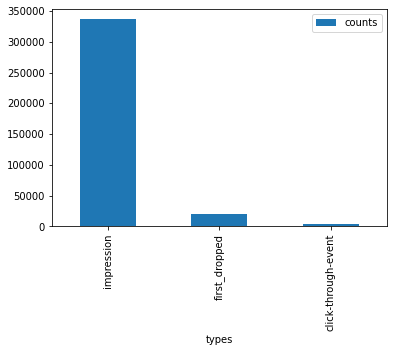

In [12]:
# types distribution
print(type_agr1)
type_agr1.plot.bar(x="types")

### Observation
- Impression is significantly higher than the other types
- click-through 

                       browser  counts
6                Chrome Mobile  125245
19               Mobile Safari   60238
7        Chrome Mobile WebView   45342
20  Mobile Safari UI/WKWebView   36676
12                    Facebook   36421


<AxesSubplot:xlabel='browser'>

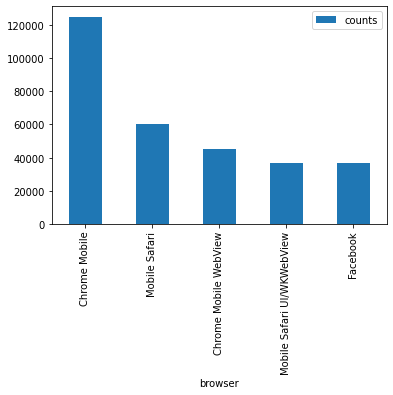

In [13]:
# browser distribution
print(brow_agr1)
brow_agr1.plot.bar(x="browser")

                                           placement  counts
0         320x480 (Fullscreen mobile / interstitial)  270476
1  320x480 (Fullscreen mobile / interstitial)\n30...   71709
3                                           Pre-roll   16149
2  320x480 (Fullscreen mobile / interstitial)\n30...    2329


<AxesSubplot:xlabel='placement'>

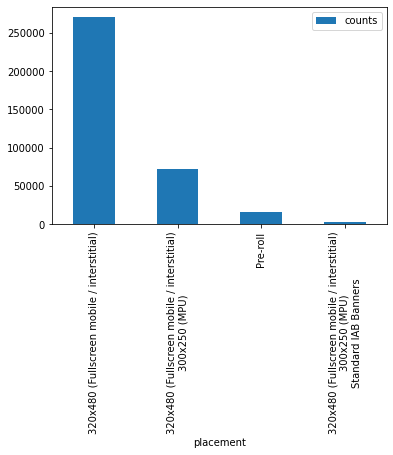

In [14]:
# browser distribution
print(place_agr1)
place_agr1.plot.bar(x="placement")

                        kpis  counts
4       CTR\nEngagement Rate  182410
6            Engagement Rate   69400
8  VTR\nCTR\nEngagement Rate   54039
5            Conversion Rate   19454
2       CTR\nConversion Rate   18254


<AxesSubplot:xlabel='kpis'>

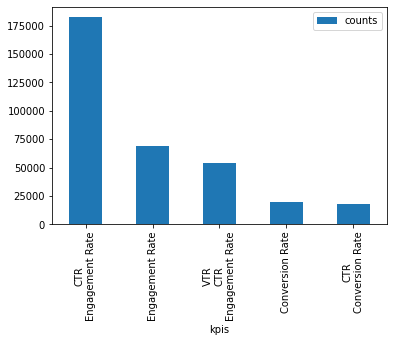

In [15]:
# browser distribution
print(kpis)
kpis.plot.bar(x="kpis")

## Bivariate Analysis

In [31]:
pd.crosstab(data["types"], data["browser"], normalize="index")

browser,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
types,,,,,,,,,,,,,,,,,,,,,
0,0.000681,0.000227,0.000227,0.000000,0.000000,0.034506,0.367310,0.105562,0.019296,0.000000,...,0.000000,0.000454,0.000000,0.030420,0.00000,0.000227,0.000454,0.032236,0.000227,0.000000
1,0.001424,0.000000,0.000102,0.000000,0.000000,0.021314,0.398515,0.140808,0.011497,0.000000,...,0.000000,0.000661,0.000305,0.019992,0.00000,0.000000,0.000407,0.042680,0.000051,0.000000
2,0.014655,0.000006,0.000187,0.000359,0.000012,0.046025,0.344008,0.125101,0.017086,0.000021,...,0.000006,0.000936,0.000110,0.031682,0.00008,0.000018,0.001485,0.046649,0.000086,0.000012


In [30]:
pd.crosstab(data["types"], data["placement"], normalize="index")

placement,0,1,2,3
types,,,,
0,0.790238,0.147333,0.000000,0.062429
1,0.787974,0.155967,0.000000,0.056059
2,0.747193,0.202002,0.006919,0.043886


In [20]:

pd.crosstab(data["types"], data["campaign_objectives"], normalize="index")

campaign_objectives,Audience Engagement\nReach,Brand Awareness,Brand Awareness\nAudience Engagement,Brand Awareness\nAudience Engagement\nVideo Views,Brand Awareness\nDrive Traffic (to site)\nAudience Engagement,Brand Awareness\nProduct Awareness\nAudience Engagement,Brand Awareness\nProduct Awareness\nConsideration / Purchase Intent,"Brand Awareness\nProduct Awareness\nConsideration / Purchase Intent\nConversion (sales, downloads)",Brand Awareness\nProduct Awareness\nConsideration / Purchase Intent\nDrive Traffic (to site),Brand Awareness\nProduct Awareness\nDrive Traffic (to site)\nAudience Engagement,"Brand Awareness\nProduct Awareness\nDrive Traffic (to site)\nConversion (sales, downloads)",Brand Awareness\nProduct Awareness\nMessage Recall\nSentiment / Favourability\nConsideration / Purchase Intent\nDrive Traffic (to site)\nAudience Engagement,"Brand Awareness\nProduct Awareness\nMessage Recall\nSentiment / Favourability\nConsideration / Purchase Intent\nDrive Traffic (to site)\nAudience Engagement\nVideo Views\nConversion (sales, downloads)",Brand Awareness\nSentiment / Favourability\nAudience Engagement,Consideration / Purchase Intent\nDrive Traffic (to site)\nAudience Engagement,"Conversion (sales, downloads)","Drive Traffic (to site)\nConversion (sales, downloads)",Video Views
types,,,,,,,,,,,,,,,,,,
click-through-event,0.000681,0.522361,0.019069,0.040636,0.106924,0.00000,0.000681,0.000000,0.073780,0.052667,0.030193,0.049716,0.000000,0.000908,0.00000,0.000000,0.039955,0.062429
first_dropped,0.000356,0.348408,0.044664,0.061858,0.211415,0.00000,0.000203,0.000000,0.036779,0.041510,0.017499,0.147268,0.000102,0.031234,0.00000,0.000000,0.002645,0.056059
impression,0.001013,0.276533,0.108214,0.045327,0.220336,0.00011,0.001494,0.000181,0.023316,0.018821,0.024373,0.148396,0.000208,0.024088,0.00008,0.006919,0.056705,0.043886


In [22]:
# label encoding
def labeler(df):
    le = preprocessing.LabelEncoder()
    for x in df.columns:
        if df[x].dtypes=='object':
            df[x]=le.fit_transform(df[x].astype(str))

    return df

In [23]:
df = labeler(data)
corr = df.corr()

In [25]:
corr.style.background_gradient(cmap='coolwarm')

,campaign_id,types,width,height,creative_id,auction_id,game_key,geo_country,site_name,platform_os,device_type,browser,campaign_name,submission_date,descriptions,campaign_objectives,kpis,placement,startdate,enddate,serving_location,black_white_audience,cost_centre,currency,buy_rate_cpe,volume_agreed,gross_cost_or_budget,agency_fee,percentages,net_cost
campaign_id,1.000000,0.009139,0.052107,0.052107,0.026876,0.003267,-0.103581,-0.098884,-0.029971,-0.004678,0.072318,-0.089235,0.000168,0.012236,-0.096498,0.004461,-0.014786,-0.198429,0.040035,0.073174,-0.097336,-0.069761,0.017215,0.115138,0.356041,-0.073673,0.026816,0.172969,-0.084913,0.009983
types,0.009139,1.000000,-0.027098,-0.027098,-0.019025,-0.000424,0.013436,-0.015701,-0.025017,-0.043241,0.069546,0.019366,0.012408,0.044099,-0.002139,0.031067,0.021793,0.006640,0.053689,0.051358,0.005425,-0.025519,-0.012086,-0.021796,-0.014374,0.000830,-0.013297,0.009877,-0.040156,0.064102
width,0.052107,-0.027098,1.000000,1.000000,-0.078435,-0.001786,0.120228,-0.394605,-0.100376,0.084711,-0.157941,-0.026125,0.286563,0.134868,0.129621,0.428974,0.065619,0.337875,0.365739,0.347220,-0.186138,-0.009370,-0.352515,-0.339343,0.030846,-0.207858,-0.202614,-0.311935,0.131154,0.138045
height,0.052107,-0.027098,1.000000,1.000000,-0.078435,-0.001786,0.120228,-0.394605,-0.100376,0.084711,-0.157941,-0.026125,0.286563,0.134868,0.129621,0.428974,0.065619,0.337875,0.365739,0.347220,-0.186138,-0.009370,-0.352515,-0.339343,0.030846,-0.207858,-0.202614,-0.311935,0.131154,0.138045
creative_id,0.026876,-0.019025,-0.078435,-0.078435,1.000000,-0.001123,0.024033,0.127918,-0.008935,-0.043332,0.047506,0.025182,0.181482,-0.160932,0.283038,0.003389,-0.097734,-0.012808,0.175464,0.171628,0.148626,0.233396,0.117673,-0.212090,-0.064124,-0.016860,-0.028778,0.032212,-0.134799,0.224040
auction_id,0.003267,-0.000424,-0.001786,-0.001786,-0.001123,1.000000,-0.001319,0.002354,0.001440,-0.001453,-0.003766,0.000684,-0.001256,-0.000005,-0.003996,0.005334,0.000049,0.003927,-0.001309,-0.000604,0.000999,0.001053,0.001132,0.001337,0.001108,-0.009972,-0.008864,0.001870,0.001773,0.001837
game_key,-0.103581,0.013436,0.120228,0.120228,0.024033,-0.001319,1.000000,-0.041573,0.145366,-0.033560,-0.032422,0.033054,0.275675,0.236018,0.153448,0.242358,0.303875,0.345337,0.279864,0.241363,0.073181,-0.112868,-0.025689,-0.082527,-0.208833,0.038681,-0.039008,-0.345333,-0.143171,0.161142
geo_country,-0.098884,-0.015701,-0.394605,-0.394605,0.127918,0.002354,-0.041573,1.000000,-0.141168,-0.083429,0.132228,-0.020900,-0.426855,-0.250361,0.020617,-0.560756,0.055841,-0.298155,-0.169602,-0.130307,0.677913,0.466003,0.906098,0.359021,-0.149606,0.141695,0.077853,0.176943,-0.515714,-0.063847
site_name,-0.029971,-0.025017,-0.100376,-0.100376,-0.008935,0.001440,0.145366,-0.141168,1.000000,-0.051483,0.010853,0.037145,0.028075,0.006784,0.088307,0.095962,0.153995,0.172359,-0.112860,-0.122453,-0.065693,-0.249161,-0.143495,0.174900,-0.082099,-0.030991,-0.060024,-0.118641,0.228086,-0.251006
platform_os,-0.004678,-0.043241,0.084711,0.084711,-0.043332,-0.001453,-0.033560,-0.083429,-0.051483,1.000000,-0.196742,-0.388434,-0.018983,0.079297,-0.081565,-0.201081,0.133552,-0.116230,-0.005960,-0.103254,-0.057175,-0.076168,-0.064604,-0.160760,0.105954,-0.089704,-0.055911,0.098005,0.066082,0.154446


### Observation
- Some variables are highly correlated

In [27]:
# the list below holds highly correlated variables those above 60% correlation.
highly_correlated = ["height","cost_center", "serving_location", "campaign_objectives" ]

In [ ]:
# label encoding
# normalizing
# distribution and correlation for numerical values.
# nlp to create word cloud of text part of the data
# removing highly correlated ones
# using random forest classifier
# create feature importance.
# text and edge extraction from the images.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
#
# Load the wine datasets
#
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
df[13] = wine.target
df.columns = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline', 'class']
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.3, random_state=1)
#
# Feature scaling
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Training / Test Dataframe
#
cols = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline']
X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

from sklearn.ensemble import RandomForestClassifier
#
# Train the mode
#
forest.fit(X_train_std, y_train.values.ravel())

importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()